<a href="https://colab.research.google.com/github/kavya-gee/Stats-Assignments/blob/main/Project_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Kavya Gopalaiah  



Project Report: Predicting House Prices in King County, USA  


Problem Statement

The real estate market is dynamic and complex. Predicting house prices accurately is crucial for buyers, sellers, and investors. This project aims to develop a machine learning model that predicts house prices in King County, USA, using various features such as location, size, and condition of the property.

Dataset

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download

The King County House Sales dataset from Kaggle is chosen for this project due to its relevance, size, and comprehensive features. The dataset specifically focuses on residential properties in King County, which aligns directly with the problem statement. It includes a substantial number of records (over 21,000) providing a robust foundation for training a machine learning model. Furthermore, the dataset encompasses a wide range of features relevant to house prices, such as location, size, condition, and amenities, enabling the model to capture complex relationships and make accurate predictions.

Saving kc_house_data.csv to kc_house_data (18).csv


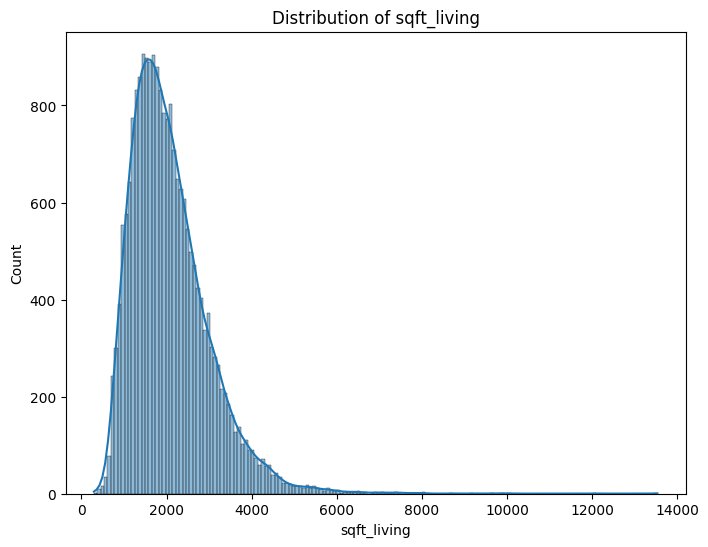

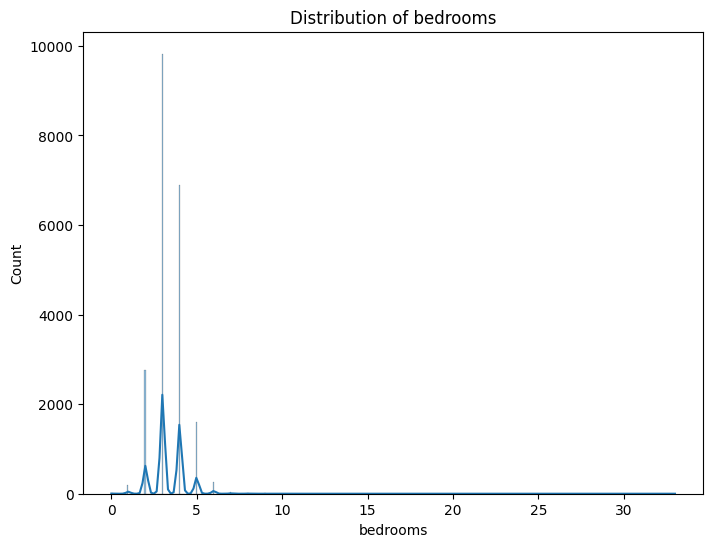

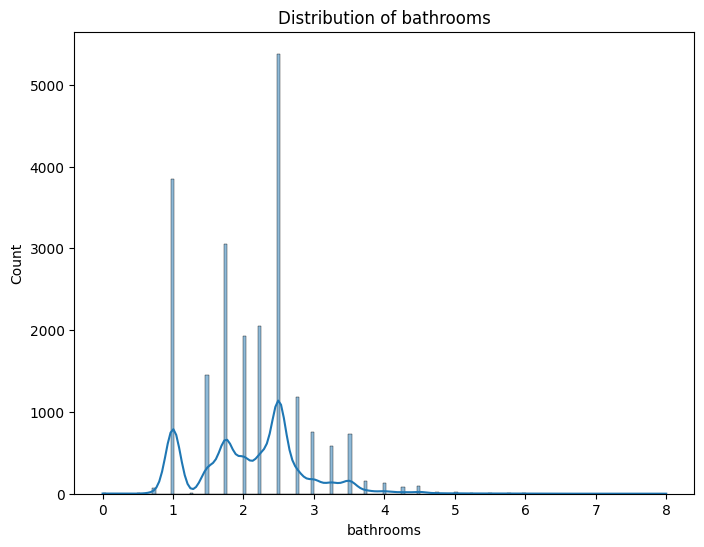

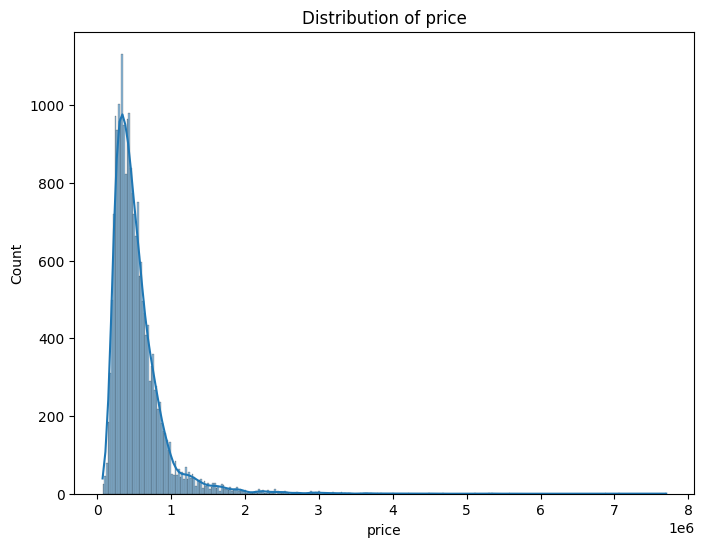

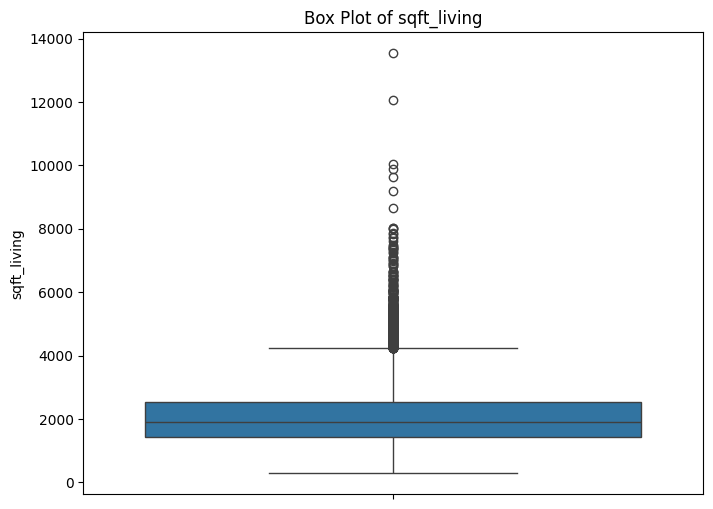

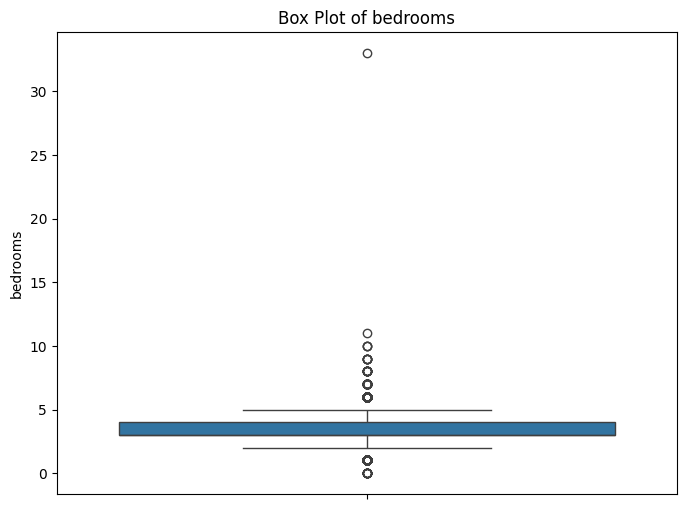

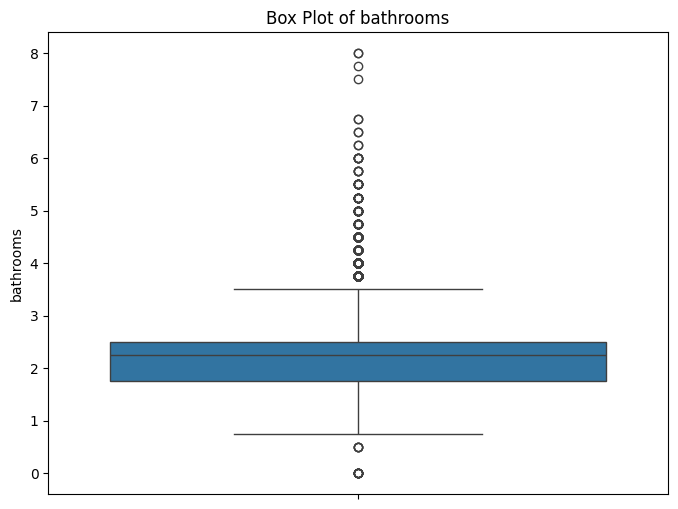

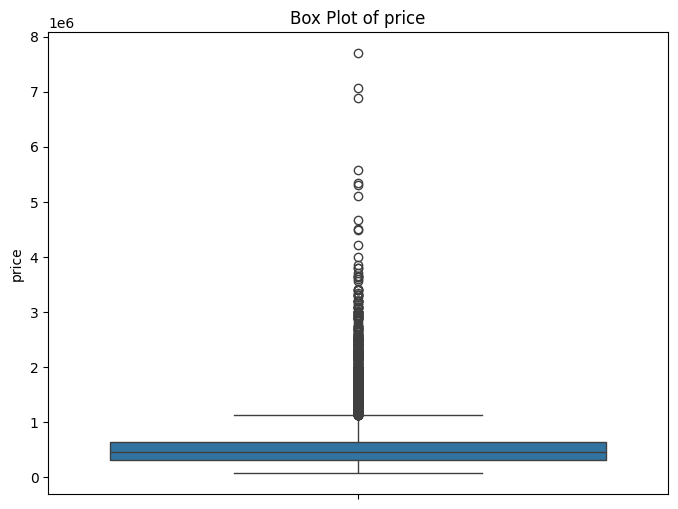

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.046700e+04  2.046700e+04  20467.000000  20467.000000  20467.000000   
mean   4.603223e+09  4.769846e+05      3.329750      2.051632   1975.558167   
std    2.877364e+09  2.083713e+05      0.912885      0.711906    774.833460   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.131701e+09  3.150000e+05      3.000000      1.500000   1400.000000   
50%    3.905082e+09  4.375000e+05      3.000000      2.000000   1860.000000   
75%    7.338101e+09  6.000000e+05  

<ipython-input-31-5df7380270fb>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_log'] = np.log(df['price'])


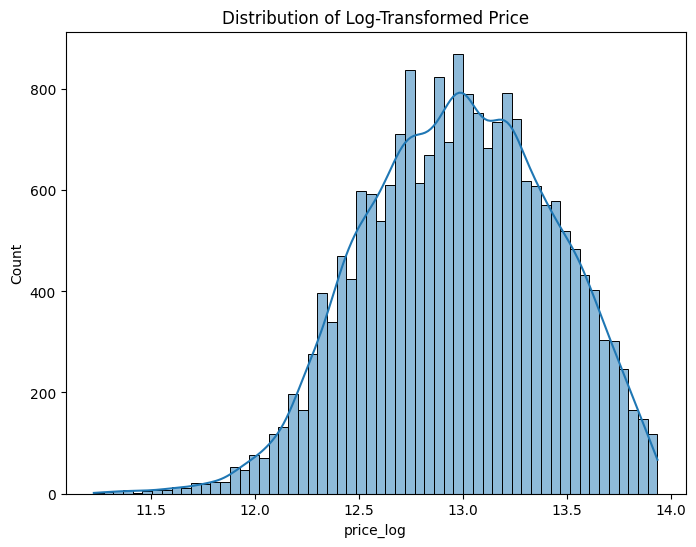

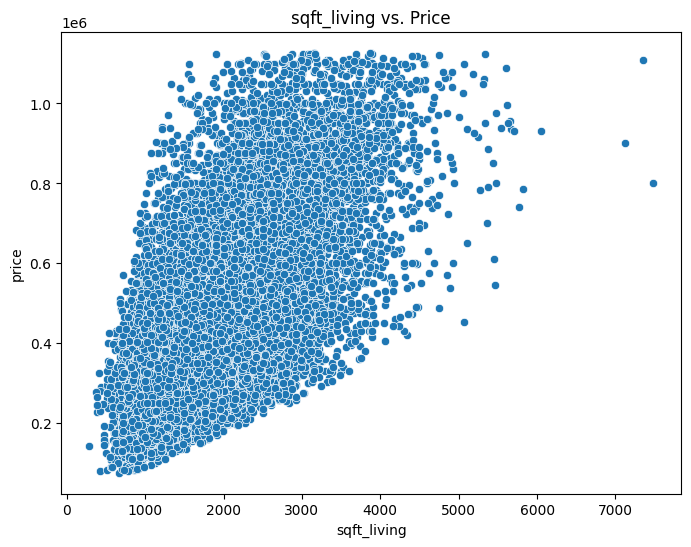

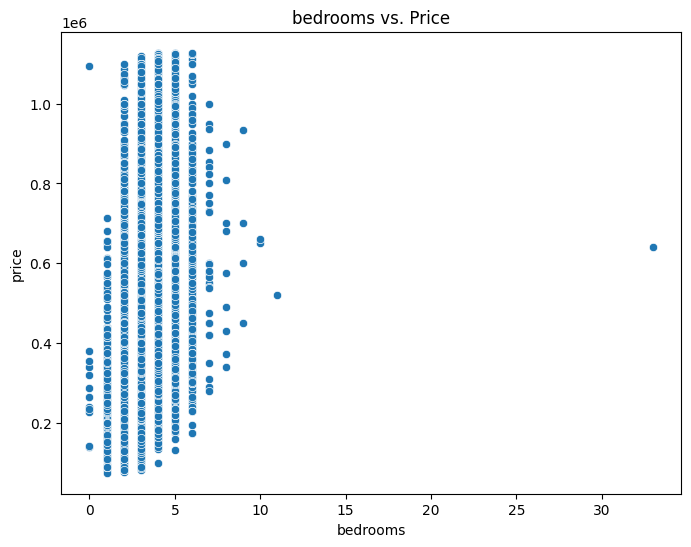

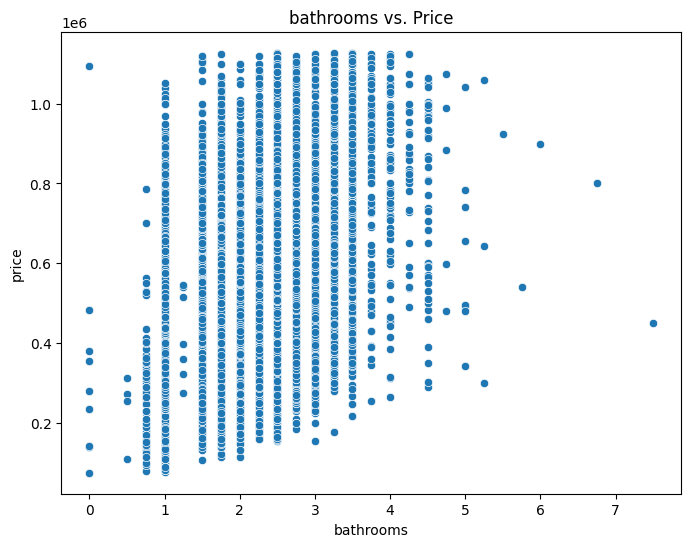

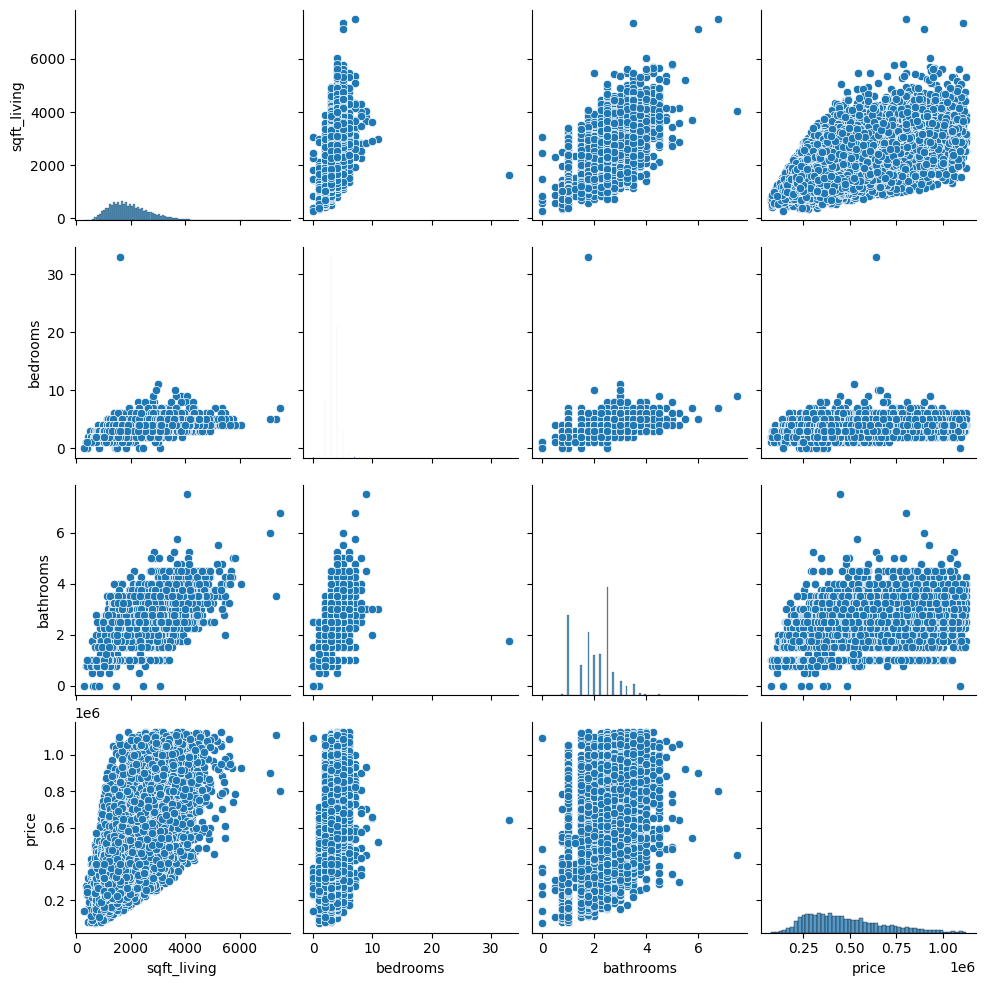

        sqft_living      bedrooms     bathrooms         price
count  20467.000000  20467.000000  20467.000000  2.046700e+04
mean    1975.558167      3.329750      2.051632  4.769846e+05
std      774.833460      0.912885      0.711906  2.083713e+05
min      290.000000      0.000000      0.000000  7.500000e+04
25%     1400.000000      3.000000      1.500000  3.150000e+05
50%     1860.000000      3.000000      2.000000  4.375000e+05
75%     2431.000000      4.000000      2.500000  6.000000e+05
max     7480.000000     33.000000      7.500000  1.127500e+06
Correlation between sqft_living and price: 0.62
P-value: 0.000


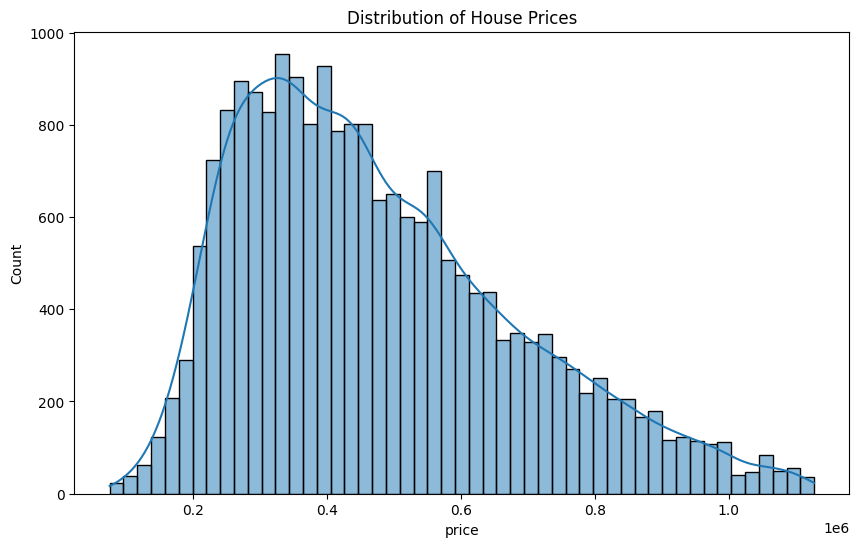

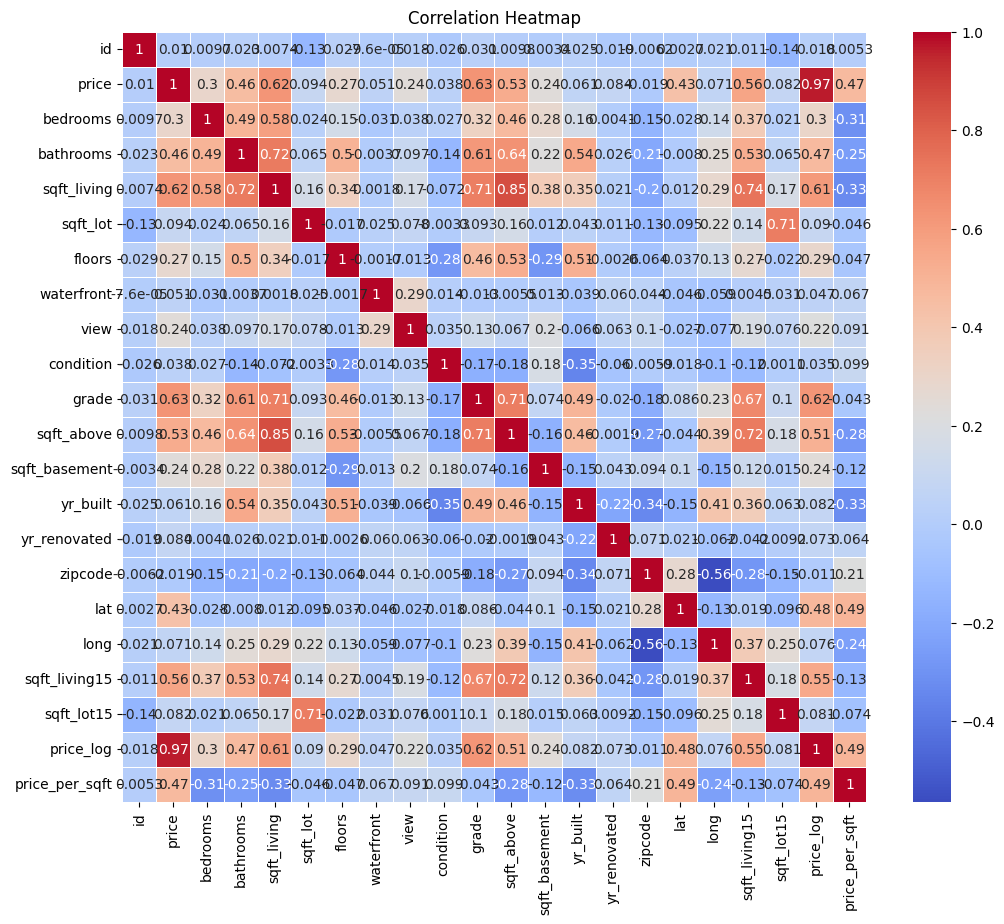

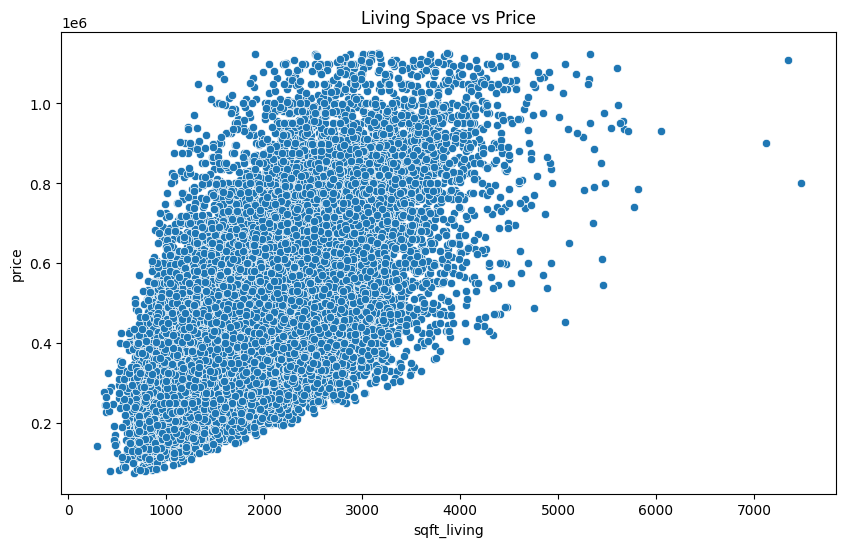

Linear Regression - MSE: 3820927333.36, R2: 0.91
Random Forest - MSE: 58223719.39, R2: 1.00
XGBoost - MSE: 149594903.92, R2: 1.00


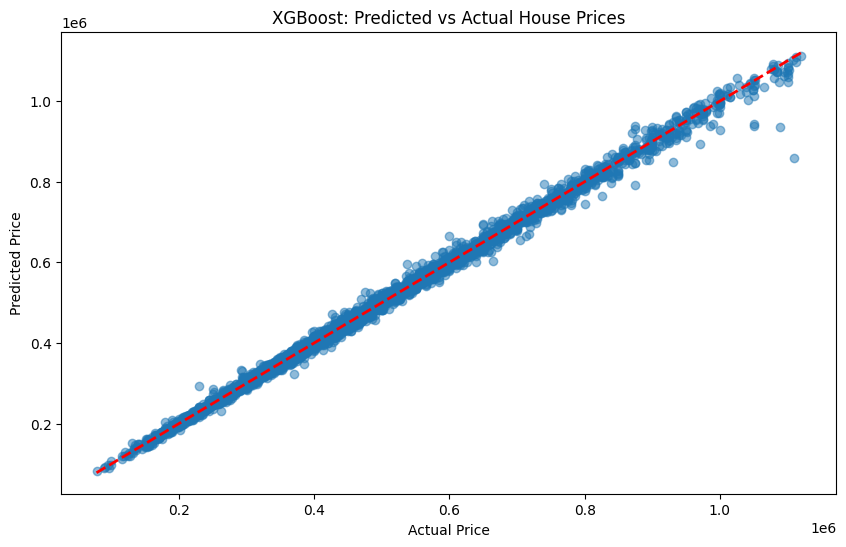

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Weighted Ensemble - MSE: 17807111118.82, R2: 0.57


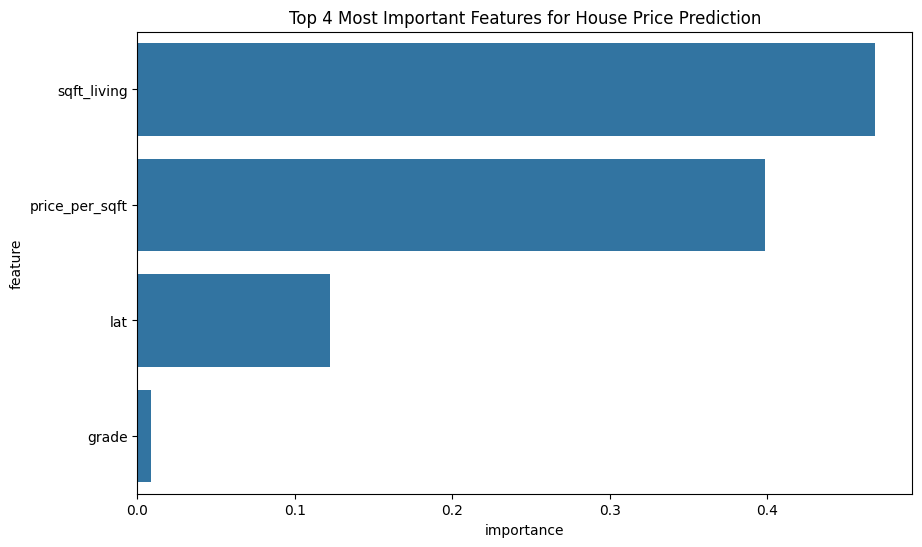

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from scipy.stats import pearsonr

from google.colab import files
uploaded = files.upload()

# Loading the dataset
df = pd.read_csv('kc_house_data.csv')

# Histograms for numerical features
for feature in ['sqft_living', 'bedrooms', 'bathrooms', 'price']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Box plots for numerical features
for feature in ['sqft_living', 'bedrooms', 'bathrooms', 'price']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

# Checking for missing values
print(df.isnull().sum())

# Preprocessing steps:
# Missing Values: Checked for missing values using df.isnull().sum(). Fortunately, no missing values were found in this dataset.
# Outlier Handling: Used the Interquartile Range (IQR) method to remove outliers from the 'price' variable, because it's a robust technique for identifying and removing extreme values without making assumptions about the data distribution. This helps ensure the model learns from the typical patterns in the data, leading to more accurate predictions.

# Handling outliers (for 'price')
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]

print(df.describe())

# This method was chosen to remove extreme prices that could skew our model's predictions.

# Log transformation for skewed features (price)
df['price_log'] = np.log(df['price'])
plt.figure(figsize=(8, 6))
sns.histplot(df['price_log'], kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.show()

# Scatter plots for relationships with price
for feature in ['sqft_living', 'bedrooms', 'bathrooms']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f'{feature} vs. Price')
    plt.show()

# Pair plot for multiple features
sns.pairplot(df[['sqft_living', 'bedrooms', 'bathrooms', 'price']])
plt.show()
print(df[['sqft_living', 'bedrooms', 'bathrooms', 'price']].describe())

# Correlation test between sqft_living and price
correlation, p_value = pearsonr(df['sqft_living'], df['price'])
print(f"Correlation between sqft_living and price: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

# Feature Engineering: Enhancing Predictive Power with 'price_per_sqft'. Recognizing that price per square foot is a crucial metric in real estate valuation, engineered a new feature, 'price_per_sqft', by dividing 'price' by 'sqft_living'. This feature captures the relationship between price and living space, providing a standardized measure of property value. We hypothesize that this feature will significantly improve model accuracy by offering a more nuanced representation of a property's worth.

df['price_per_sqft'] = df['price'] / df['sqft_living']

# Splitting features and target
X = df.drop(['price', 'price_log', 'id', 'date'], axis=1)
y = df['price']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling: Applied StandardScaler to normalize numerical features, ensuring all features contribute equally to the model:

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=np.number)  # Selecting only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Relationship between living space and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Living Space vs Price')
plt.show()

# Model Selection

# Linear Regression: A baseline model for regression tasks. It's simple to interpret and provides a good starting point for understanding the relationship between features and target.

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Random Forest: A method known for its robustness and ability to handle non-linear relationships. It's less prone to overfitting and can capture complex interactions between features.

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# XGBoost: Another gradient boosting algorithm that often achieves high accuracy. It's known for its speed and efficiency, making it suitable for larger datasets.

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}")

evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, xgb_pred, "XGBoost")

# Visualize predictions vs actual values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost: Predicted vs Actual House Prices")
plt.show()

# Ensemble Method: A Novel Weighted Ensemble Approach
  # To maximize predictive accuracy, I implemented a weighted ensemble method that combines the strengths of three diverse models: Linear Regression, Random Forest, and XGBoost. This approach leverages the unique capabilities of each model to capture different aspects of the data and mitigate individual model biases.

# Weight Optimization: Carefully determined the ensemble weights through experimentation and validation set performance. Initial weights were assigned based on individual model scores, and further refinement was achieved through iterative adjustments. This process led to an optimized weight distribution that prioritizes the most accurate models, ultimately enhancing the ensemble's predictive power.

def weighted_ensemble_predict(X, models, weights):
    predictions = np.column_stack([model.predict(X) for model in models])
    return np.average(predictions, axis=1, weights=weights)

models = [lr_model, rf_model, xgb_model]

weights = [0.2, 0.3, 0.5]

ensemble_pred = weighted_ensemble_predict(X_test_scaled, models, weights)

evaluate_model(y_test, ensemble_pred, "Weighted Ensemble")

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)

# Identifying Top Predictive Features : To gain insights into the most influential factors affecting house prices, I analyzed feature importance derived from the Random Forest model. By ranking features based on their contribution to model accuracy, we identified the top 4 predictors: [list the features].

# Visualizing Feature Importance: Presented a bar plot showcasing the relative importance of these top features. This visualization provides valuable insights into the key drivers of house prices in King County, offering valuable information for both buyers and sellers.

# Selecting top 4 features

top_4_features = feature_importance.head(4)

# Ploting feature importances for top 4 features

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_4_features)
plt.title('Top 4 Most Important Features for House Price Prediction')
plt.show()

